Tomando como conjunto de datos la base de datos histórica: https://github.com/jmcastagnetto/covid-19-peru-data/blob/master/datos/covid-19-peru-data.csv:

- Construir un predictor para el número de casos y número de muertes del Covid-19 en el Perú y Arequipa (la predicción debe ser realizada en un rango del 19  al 29 de octubre 2020).
- Usar como base el pipeline mostrado para desarrollar un proyecto de Machine Learning.
- Pueden ser utilizados otros modelos de Sci-kit learn u otras librerías.
- De manera obligatoria debe ser utilizada una implementación propia del algoritmo de regresión lineal multivariada (con gradiente descendiente).
- El envio debe ser un Jupyter Notebook, con todas las etapas del proceso llevado a cabo.
- Pueden ser incluidas variables adicionales para mejorar las predicciones.

In [252]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sklearn.model_selection import train_test_split

In [253]:
#!!
import os

# Where to save the figures
PROJECT_ROOT_DIR = "."
#CHAPTER_ID = "end_to_end_project"
#IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### Get the Data

In [254]:
def load_data(filename):
    return pd.read_csv(filename)

In [255]:
data_original = load_data('data/c_covid-19-peru-data.csv')
covid = data_original.copy()
covid.head()

,country,iso3c,region,date,confirmed,deaths,recovered,total_tests,negative_tests,pcr_test_positive,serological_test_positive,pcr_serological_test_positive
0,Peru,PER,NaN,2020-03-06,1.0,NaN,NaN,NaN,154.0,NaN,NaN,NaN
1,Peru,PER,NaN,2020-03-07,6.0,NaN,NaN,NaN,213.0,NaN,NaN,NaN
2,Peru,PER,NaN,2020-03-09,9.0,NaN,NaN,NaN,309.0,NaN,NaN,NaN
3,Peru,PER,NaN,2020-03-10,11.0,NaN,NaN,NaN,335.0,NaN,NaN,NaN
4,Peru,PER,NaN,2020-03-11,17.0,NaN,NaN,NaN,697.0,NaN,NaN,NaN


In [256]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5261 entries, 0 to 5260
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country                        5261 non-null   object 
 1   iso3c                          5261 non-null   object 
 2   region                         5047 non-null   object 
 3   date                           5261 non-null   object 
 4   confirmed                      5105 non-null   float64
 5   deaths                         4507 non-null   float64
 6   recovered                      232 non-null    float64
 7   total_tests                    3970 non-null   float64
 8   negative_tests                 4002 non-null   float64
 9   pcr_test_positive              4614 non-null   float64
 10  serological_test_positive      4550 non-null   float64
 11  pcr_serological_test_positive  24 non-null     float64
dtypes: float64(8), object(4)
memory usage: 493.3+ KB

In [257]:
covid["country"].value_counts()

Peru    5261
Name: country, dtype: int64

In [258]:
country = covid.groupby(['country'])
peru = country.get_group('Peru')
peru.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5261 entries, 0 to 5260
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country                        5261 non-null   object 
 1   iso3c                          5261 non-null   object 
 2   region                         5047 non-null   object 
 3   date                           5261 non-null   object 
 4   confirmed                      5105 non-null   float64
 5   deaths                         4507 non-null   float64
 6   recovered                      232 non-null    float64
 7   total_tests                    3970 non-null   float64
 8   negative_tests                 4002 non-null   float64
 9   pcr_test_positive              4614 non-null   float64
 10  serological_test_positive      4550 non-null   float64
 11  pcr_serological_test_positive  24 non-null     float64
dtypes: float64(8), object(4)
memory usage: 534.3+ KB

In [259]:
covid["region"].value_counts()

Huánuco               208
Cusco                 208
Arequipa              208
Ica                   208
Piura                 206
Lambayeque            206
Ancash                206
La Libertad           206
Callao                206
Loreto                204
Madre de Dios         203
Junín                 201
San Martín            198
Tumbes                197
Cajamarca             196
Pasco                 194
Tacna                 192
Ayacucho              192
Huancavelica          189
Apurimac              187
Moquegua              185
Puno                  183
Amazonas              182
Ucayali               180
Lima                  114
Lima Región            94
Lima Metropolitana     94
Name: region, dtype: int64

In [260]:
regions = covid.groupby(['region'])
aqp = regions.get_group('Arequipa')
aqp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208 entries, 6 to 5237
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country                        208 non-null    object 
 1   iso3c                          208 non-null    object 
 2   region                         208 non-null    object 
 3   date                           208 non-null    object 
 4   confirmed                      202 non-null    float64
 5   deaths                         180 non-null    float64
 6   recovered                      0 non-null      float64
 7   total_tests                    148 non-null    float64
 8   negative_tests                 148 non-null    float64
 9   pcr_test_positive              174 non-null    float64
 10  serological_test_positive      174 non-null    float64
 11  pcr_serological_test_positive  2 non-null      float64
dtypes: float64(8), object(4)
memory usage: 21.1+ KB


In [261]:
aqp.describe()

,confirmed,deaths,recovered,total_tests,negative_tests,pcr_test_positive,serological_test_positive,pcr_serological_test_positive
count,202.000000,180.000000,0.0,148.000000,148.000000,174.000000,174.000000,2.0
mean,12406.108911,505.350000,NaN,124059.709459,107190.574324,2272.563218,12122.752874,1.0
std,14272.034552,510.367733,NaN,65212.092915,51514.201497,1782.508560,12730.037436,0.0
min,2.000000,1.000000,NaN,16668.000000,15878.000000,69.000000,8.000000,1.0
25%,664.250000,24.500000,NaN,75739.750000,69916.000000,474.500000,1909.000000,1.0
50%,5826.500000,285.000000,NaN,115147.000000,105121.500000,1967.500000,5927.000000,1.0
75%,22300.250000,1032.250000,NaN,183214.500000,152066.500000,4075.750000,22469.750000,1.0
max,42439.000000,1380.000000,NaN,231330.000000,188891.000000,5203.000000,37236.000000,1.0


### Discover and visualize the data to gain insights

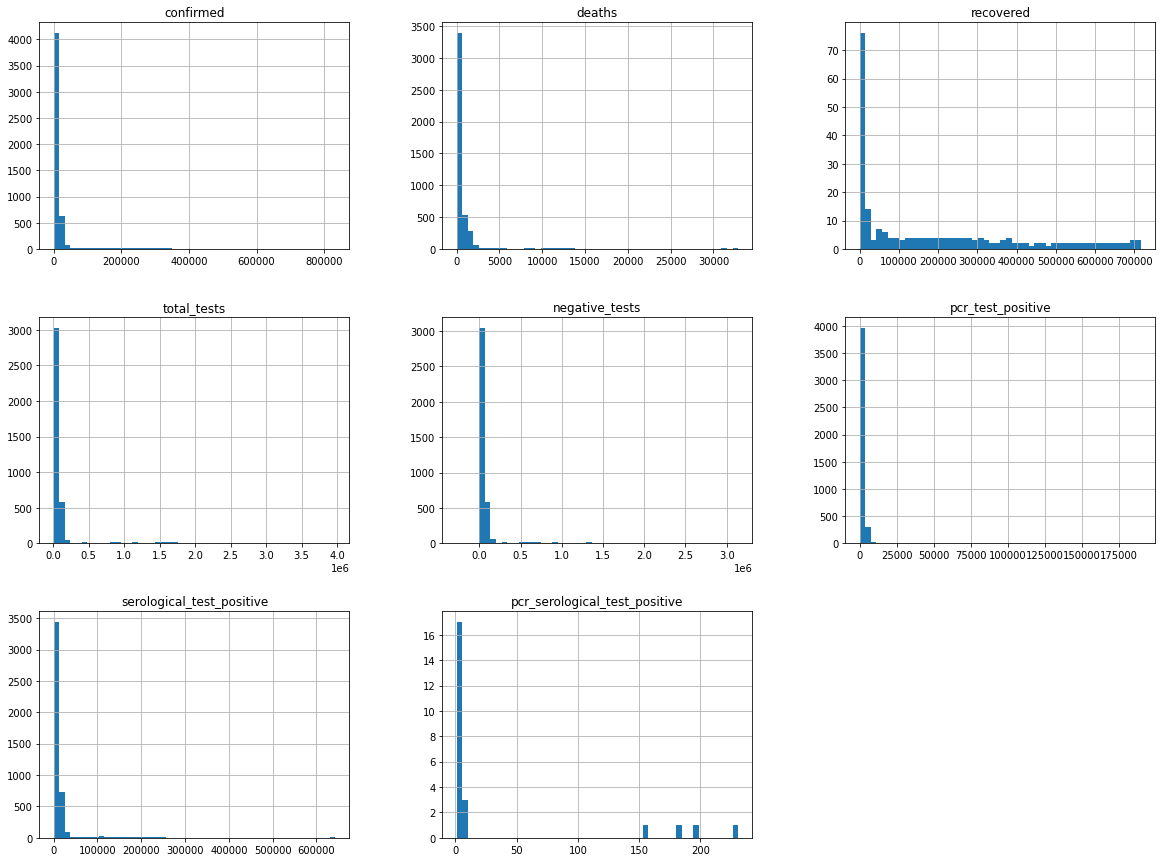

In [262]:
%matplotlib inline
covid.hist(bins=50, figsize=(20,15))
#save_fig("attribute_histogram_plots")
plt.show()

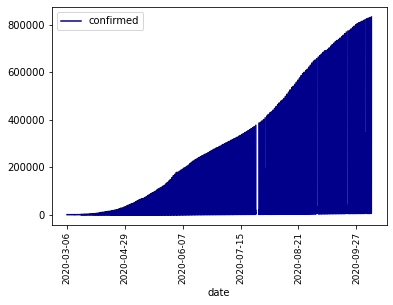

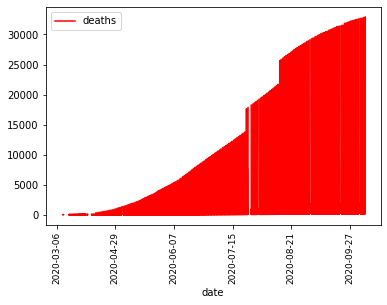

In [263]:
%matplotlib inline
peru.plot.line(x='date',y='confirmed', color='DarkBlue')
plt.xticks(fontsize = 9, rotation=90)
peru.plot.line(x='date',y='deaths', color='Red')
plt.xticks(fontsize = 9, rotation=90)

plt.show()

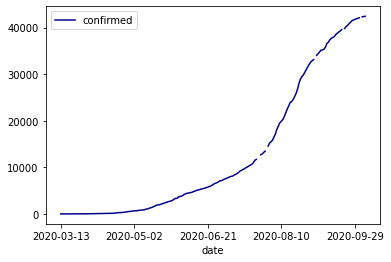

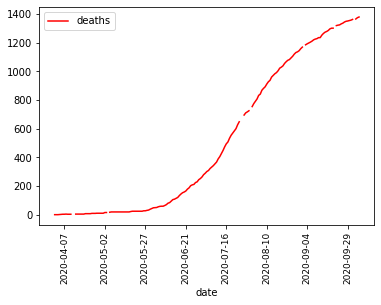

In [264]:
%matplotlib inline
aqp.plot.line(x='date',y='confirmed', color='DarkBlue')
aqp.plot.line(x='date',y='deaths', color='Red')
plt.xticks(fontsize = 9, rotation=90)

plt.show()

In [265]:
# AQP: Selection columns needed and convert to numpy
dates_aqp = aqp.loc[:,['date']]
confirmed_aqp = aqp.loc[:,['confirmed']].to_numpy()
deaths_aqp = aqp.loc[:,['deaths']].to_numpy()
days_since_start_aqp = np.array([range(len(dates_aqp))])

In [266]:
# PERU: Selection columns needed and convert to numpy
dates_p = peru.loc[:,['date']]
confirmed_p = peru.loc[:,['confirmed']].to_numpy()
deaths_p = peru.loc[:,['deaths']].to_numpy()
days_since_start_p = np.array([range(len(dates_p))])
print(days_since_start_p)

[[   0    1    2 ... 5258 5259 5260]]


### Prepare the data for Machine Learning algorithms

In [267]:
# AQP: Replace NaN with zero
confirmed_aqp = np.nan_to_num(confirmed_aqp, np.nan)
deaths_aqp = np.nan_to_num(deaths_aqp, np.nan)

X_train_confirmed_aqp, X_test_confirmed_aqp, y_train_confirmed_aqp, y_test_confirmed_aqp = train_test_split(days_since_start_aqp.reshape(-1,1), confirmed_aqp, test_size=0.4, shuffle=False)
X_train_deaths_aqp, X_test_deaths_aqp, y_train_deaths_aqp, y_test_deaths_aqp = train_test_split(days_since_start_aqp.reshape(-1,1), deaths_aqp, test_size=0.4, shuffle=False)
#print(y_test_confirmed_aqp)

#X_train_confirmed_aqp, X_test_confirmed_aqp, y_train_confirmed_aqp, y_test_confirmed_aqp = train_test_split(days_since_start_aqp.reshape(-1,1), confirmed_aqp, test_size=0.2, random_state=42)
#X_train_deaths_aqp, X_test_deaths_aqp, y_train_deaths_aqp, y_test_deaths_aqp = train_test_split(days_since_start_aqp.reshape(-1,1), deaths_aqp, test_size=0.2, random_state=42)

In [268]:
# PERÚ: Replace NaN with zero
confirmed_p = np.nan_to_num(confirmed_p,np.nan)
deaths_p = np.nan_to_num(deaths_p,np.nan)

X_train_confirmed_p, X_test_confirmed_p, y_train_confirmed_p, y_test_confirmed_p = train_test_split(days_since_start_p.reshape(-1,1), confirmed_p, test_size=0.42, shuffle=False)
X_train_deaths_p, X_test_deaths_p, y_train_deaths_p, y_test_deaths_p = train_test_split(days_since_start_p.reshape(-1,1), deaths_p, test_size=0.42, shuffle=False)
#print(y_test_confirmed_p)

#X_train_confirmed_p, X_test_confirmed_p, y_train_confirmed_p, y_test_confirmed_p = train_test_split(days_since_start_p.reshape(-1,1), confirmed_p, test_size=0.2, random_state=42)
#X_train_deaths_p, X_test_deaths_p, y_train_deaths_p, y_test_deaths_p = train_test_split(days_since_start_p.reshape(-1,1), deaths_p, test_size=0.2, random_state=42)

The prediction should be made in a range from 19 to 29 October 2020.

In [269]:
def predictions_plot(x, y, prediction, future_forcast, algo_name, color, title):
    plt.figure(figsize=(6,4))
    plt.plot(x, y)
    plt.plot(future_forcast, prediction, linestyle='dashed', color=color)
    plt.title('# de ' + title + ' en el tiempo', size=15)
    plt.xlabel('Días transcurridos', size=15)
    plt.ylabel(title, size=15)
    plt.legend([ title +' confirmados', algo_name], prop={'size': 10})
    plt.xticks(size=10)
    plt.yticks(size=10)
    plt.show()

In [270]:
# AQP
days_in_future_aqp = 10
future_forcast_aqp = np.array([i for i in range(len(dates_aqp) + days_in_future_aqp)]).reshape(-1, 1)
adjusted_dates_aqp = future_forcast_aqp[:-10]

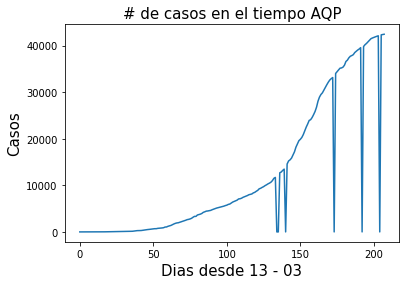

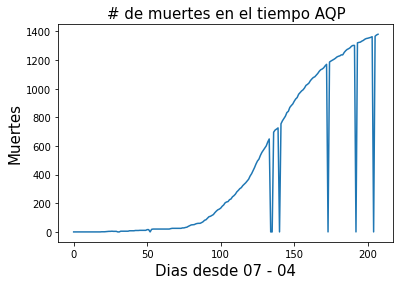

In [271]:
adjusted_dates_aqp = adjusted_dates_aqp.reshape(1, -1)[0]
plt.plot(adjusted_dates_aqp, confirmed_aqp)
plt.title('# de casos en el tiempo AQP', size=15)
plt.xlabel('Dias desde 13 - 03', size=15)
plt.ylabel('Casos', size=15)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

#plt.figure(figsize=(8, 4.5))
plt.plot(adjusted_dates_aqp, deaths_aqp)
plt.title('# de muertes en el tiempo AQP', size=15)
plt.xlabel('Dias desde 07 - 04', size=15)
plt.ylabel('Muertes', size=15)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

In [272]:
start_aqp = '10/19/2020'
start_date_aqp = datetime.datetime.strptime(start_aqp, '%m/%d/%Y')
future_forcast_dates_aqp = []
for i in range(len(future_forcast_aqp)):
    future_forcast_dates_aqp.append((start_date_aqp + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))
#print(future_forcast_dates)

In [273]:
# PERU
days_in_future_p = 10
future_forcast_p = np.array([i for i in range(len(dates_p) + days_in_future_p)]).reshape(-1, 1)
adjusted_dates_p = future_forcast_p[:-10]

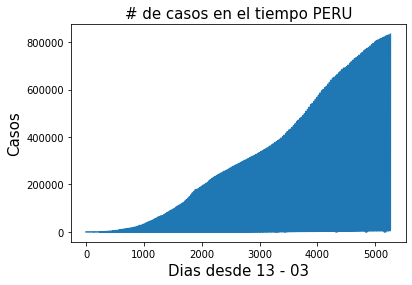

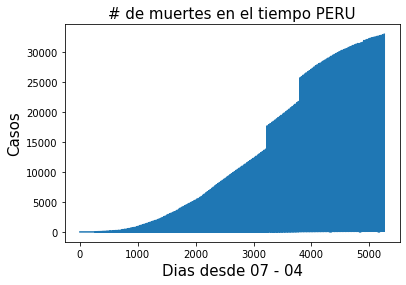

In [274]:
adjusted_dates_p = adjusted_dates_p.reshape(1, -1)[0]
plt.plot(adjusted_dates_p, confirmed_p)
plt.title('# de casos en el tiempo PERU', size=15)
plt.xlabel('Dias desde 13 - 03', size=15)
plt.ylabel('Casos', size=15)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

#plt.figure(figsize=(8, 4.5))
plt.plot(adjusted_dates_p, deaths_p)
plt.title('# de muertes en el tiempo PERU', size=15)
plt.xlabel('Dias desde 07 - 04', size=15)
plt.ylabel('Casos', size=15)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

In [275]:
start_p = '10/19/2020'
start_date_p = datetime.datetime.strptime(start_p, '%m/%d/%Y')
future_forcast_dates_p = []
for i in range(len(future_forcast_p)):
    future_forcast_dates_p.append((start_date_p + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))
#print(future_forcast_dates)

## Select and train a model 

### Regression Linear Polynomial

Cases - AQP

In [276]:
from sklearn.preprocessing import PolynomialFeatures

# Transform data for polynomial regression
poly = PolynomialFeatures(degree=2)

# Cases - confirmed
poly_X_train_caqp = poly.fit_transform(X_train_confirmed_aqp)
poly_X_test_caqp = poly.fit_transform(X_test_confirmed_aqp)

# Deaths
poly_X_train_daqp = poly.fit_transform(X_train_deaths_aqp)
poly_X_test_daqp = poly.fit_transform(X_test_deaths_aqp)

poly_future_forcast_aqp = poly.fit_transform(future_forcast_aqp)

In [277]:
from sklearn.linear_model import LinearRegression
linear_poly_caqp = LinearRegression(normalize=True, fit_intercept=False)
linear_poly_caqp.fit(poly_X_train_caqp, y_train_confirmed_aqp)
theta_linear_poly_caqp = linear_poly_caqp.predict(poly_X_test_caqp)
linear_poly_prediction_caqp = linear_poly_caqp.predict(poly_future_forcast_aqp)

In [278]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mse_linear_poly_caqp = mean_squared_error(y_test_confirmed_aqp, theta_linear_poly_caqp)
rmse_linear_poly_caqp = np.sqrt(mse_linear_poly_caqp)
mae_linear_poly_caqp = mean_absolute_error(y_test_confirmed_aqp, theta_linear_poly_caqp)
print('Linear Polynomial MSE: ', mse_linear_poly_caqp)
print('Linear Polynomial SquareMSE: ', rmse_linear_poly_caqp)
print('Linear Polynomial MAE: ', mae_linear_poly_caqp)

# Variance Score. The best score is 1.0
variance_poly_caqp = r2_score(y_test_confirmed_aqp, theta_linear_poly_caqp)
print('Variance score: %.2f' % variance_poly_caqp)

Linear Polynomial MSE:  125056573.41201341
Linear Polynomial SquareMSE:  11182.869641197352
Linear Polynomial MAE:  9406.539910062847
Variance score: 0.24


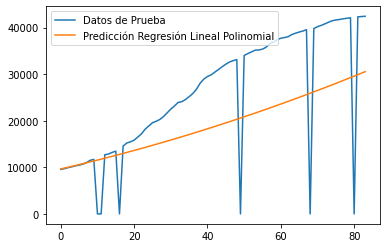

In [279]:
plt.plot(y_test_confirmed_aqp)
plt.plot(theta_linear_poly_caqp)
plt.legend(['Datos de Prueba', 'Predicción Regresión Lineal Polinomial'])

Deaths - AQP

In [280]:
linear_poly_daqp = LinearRegression(normalize=True, fit_intercept=False)
linear_poly_daqp.fit(poly_X_train_daqp, y_train_deaths_aqp)
theta_linear_poly_daqp = linear_poly_daqp.predict(poly_X_test_daqp)
linear_poly_prediction_daqp = linear_poly_daqp.predict(poly_future_forcast_aqp)

In [281]:
mse_linear_poly_daqp = mean_squared_error(y_test_deaths_aqp, theta_linear_poly_daqp)
mae_linear_poly_daqp = mean_absolute_error(y_test_deaths_aqp, theta_linear_poly_daqp)
print('Linear Polynomial MSE: ', mse_linear_poly_daqp)
print('Linear Polynomial MAE: ', mae_linear_poly_daqp)

# Variance Score. The best score is 1.0
variance_poly_daqp = r2_score(y_test_deaths_aqp, theta_linear_poly_daqp)
print('Variance score: %.2f' % variance_poly_daqp)

Linear Polynomial MSE:  97010.5677582753
Linear Polynomial MAE:  221.53139897273545
Variance score: 0.29


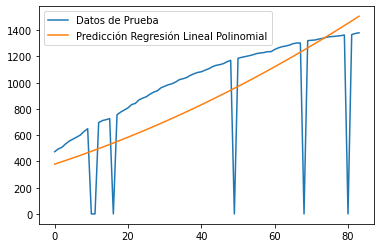

In [282]:
plt.plot(y_test_deaths_aqp)
plt.plot(theta_linear_poly_daqp)
plt.legend(['Datos de Prueba', 'Predicción Regresión Lineal Polinomial'])

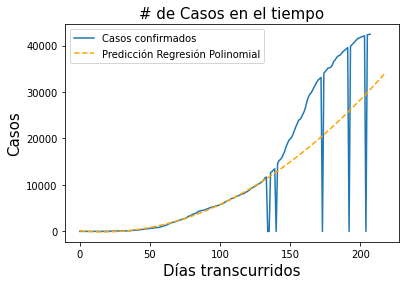

In [283]:
predictions_plot(adjusted_dates_aqp, confirmed_aqp, linear_poly_prediction_caqp, future_forcast_aqp, 'Predicción Regresión Polinomial', 'orange', 'Casos')

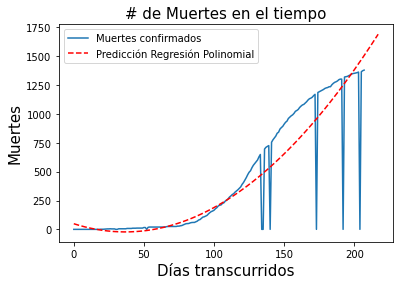

In [284]:
predictions_plot(adjusted_dates_aqp, deaths_aqp, linear_poly_prediction_daqp, future_forcast_aqp, 'Predicción Regresión Polinomial', 'red', 'Muertes')

In [285]:
# Future Predictions - Regression Polynomial
linear_poly_prediction_caqp = linear_poly_prediction_caqp.reshape(1,-1)[0]
linear_poly_prediction_daqp = linear_poly_prediction_daqp.reshape(1,-1)[0]
lp = pd.DataFrame({'Fecha': future_forcast_dates_aqp[:11], 'Casos': np.round(linear_poly_prediction_caqp[:11]),'Muertes':np.round(linear_poly_prediction_daqp[:11])})
#lp = pd.DataFrame({'Fecha': future_forcast_dates_aqp[-10:], 'Casos': np.round(linear_poly_prediction_caqp[-10:]),'Muertes':np.round(linear_poly_prediction_daqp[-10:])})
lp

,Fecha,Casos,Muertes
0,10/19/2020,120.0,49.0
1,10/20/2020,93.0,45.0
2,10/21/2020,68.0,41.0
3,10/22/2020,44.0,38.0
4,10/23/2020,23.0,34.0
5,10/24/2020,3.0,31.0
6,10/25/2020,-16.0,27.0
7,10/26/2020,-33.0,24.0
8,10/27/2020,-48.0,21.0
9,10/28/2020,-61.0,18.0


Cases - PERÚ

In [286]:
# Transform data for polynomial regression
poly = PolynomialFeatures(degree=2)

# Cases - confirmed
poly_X_train_cp = poly.fit_transform(X_train_confirmed_p)
poly_X_test_cp = poly.fit_transform(X_test_confirmed_p)

# Deaths
poly_X_train_dp = poly.fit_transform(X_train_deaths_p)
poly_X_test_dp = poly.fit_transform(X_test_deaths_p)

poly_future_forcast_p = poly.fit_transform(future_forcast_p)

In [287]:
linear_poly_cp = LinearRegression(normalize=True, fit_intercept=False)
linear_poly_cp.fit(poly_X_train_cp, y_train_confirmed_p)
theta_linear_poly_cp = linear_poly_cp.predict(poly_X_test_cp)
linear_poly_prediction_cp = linear_poly_cp.predict(poly_future_forcast_p)

In [288]:
print('PERÚ:')
mse_linear_poly_cp = mean_squared_error(y_test_confirmed_p, theta_linear_poly_cp)
print('Linear Polynomial MSE: ', mse_linear_poly_cp)
print('Linear Polynomial SquareMSE: ', np.sqrt(mse_linear_poly_cp))
print('Linear Polynomial MAE: ', mean_absolute_error(y_test_confirmed_p, theta_linear_poly_cp))

# Variance Score. The best score is 1.0
variance_poly_cp = r2_score(y_test_confirmed_p, theta_linear_poly_cp)
print('Variance score: %.2f' % variance_poly_cp)

PERÚ:
Linear Polynomial MSE:  15237842197.479214
Linear Polynomial SquareMSE:  123441.6550337819
Linear Polynomial MAE:  62605.51712218831
Variance score: 0.01


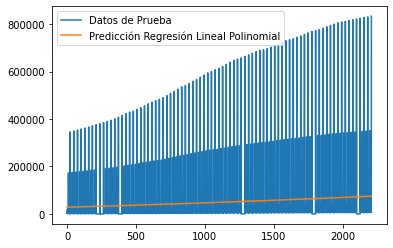

In [289]:
plt.plot(y_test_confirmed_p)
plt.plot(theta_linear_poly_cp)
plt.legend(['Datos de Prueba', 'Predicción Regresión Lineal Polinomial'])

Deaths - PERÚ

In [290]:
linear_poly_dp = LinearRegression(normalize=True, fit_intercept=False)
linear_poly_dp.fit(poly_X_train_dp, y_train_deaths_p)
theta_linear_poly_dp = linear_poly_dp.predict(poly_X_test_dp)
linear_poly_prediction_dp = linear_poly_dp.predict(poly_future_forcast_p)

In [291]:
print('Linear Polynomial MSE: ', mean_squared_error(y_test_deaths_p, theta_linear_poly_dp))
print('Linear Polynomial MAE: ', mean_absolute_error(y_test_deaths_p, theta_linear_poly_dp))

# Variance Score. The best score is 1.0
variance_poly_dp = r2_score(y_test_deaths_p, theta_linear_poly_dp)
print('Variance score: %.2f' % variance_poly_dp)

Linear Polynomial MSE:  27619335.94844263
Linear Polynomial MAE:  2473.1002062237812
Variance score: 0.00


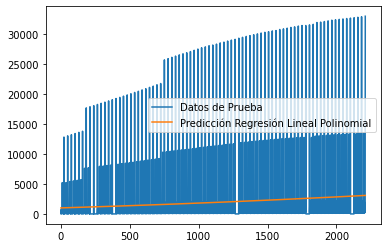

In [292]:
plt.plot(y_test_deaths_p)
plt.plot(theta_linear_poly_dp)
plt.legend(['Datos de Prueba', 'Predicción Regresión Lineal Polinomial'])

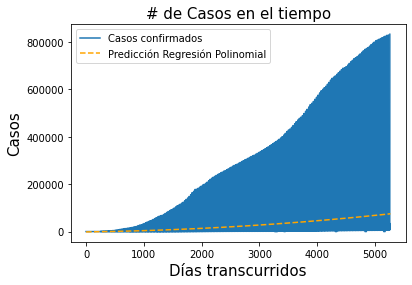

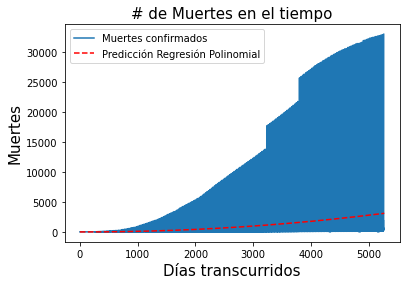

In [293]:
predictions_plot(adjusted_dates_p, confirmed_p, linear_poly_prediction_cp, future_forcast_p, 'Predicción Regresión Polinomial', 'orange', 'Casos')
predictions_plot(adjusted_dates_p, deaths_p, linear_poly_prediction_dp, future_forcast_p, 'Predicción Regresión Polinomial', 'red', 'Muertes')

In [294]:
# Future Predictions - Regression Polynomial
linear_poly_prediction_cp = linear_poly_prediction_cp.reshape(1,-1)[0]
linear_poly_prediction_dp = linear_poly_prediction_dp.reshape(1,-1)[0]
lp_p = pd.DataFrame({'Fecha': future_forcast_dates_p[:11], 'Casos': np.round(linear_poly_prediction_cp[:11]),'Muertes':np.round(linear_poly_prediction_dp[:11])})
#lp_p = pd.DataFrame({'Fecha': future_forcast_dates_p[-10:], 'Casos': np.round(linear_poly_prediction_cp[-10:]),'Muertes':np.round(linear_poly_prediction_dp[-10:])})
lp_p

,Fecha,Casos,Muertes
0,10/19/2020,-1535.0,-9.0
1,10/20/2020,-1531.0,-9.0
2,10/21/2020,-1528.0,-9.0
3,10/22/2020,-1525.0,-9.0
4,10/23/2020,-1522.0,-9.0
5,10/24/2020,-1519.0,-9.0
6,10/25/2020,-1515.0,-9.0
7,10/26/2020,-1512.0,-9.0
8,10/27/2020,-1509.0,-9.0
9,10/28/2020,-1506.0,-9.0


### SVM - AQP

Cases

In [295]:
from sklearn.svm import SVR

svm_reg_caqp = SVR(shrinking=True, kernel="poly", gamma=0.01, epsilon=1, degree=4, C=0.1)
svm_reg_caqp.fit(X_train_confirmed_aqp, y_train_confirmed_aqp)
theta_svm_pred_caqp = svm_reg_caqp.predict(X_test_confirmed_aqp)
svm_reg_predictions_caqp = svm_reg_caqp.predict(future_forcast_aqp)

c:\users\user\documents\actual\jupyter\jenv\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [296]:
#print(theta_pred_svm_caqp.shape)
#print(y_test_confirmed.shape)
mse_svm_caqp = mean_squared_error(y_test_confirmed_aqp, theta_svm_pred_caqp)
rmse_svm_caqp = np.sqrt(mse_svm_caqp)
mae_svm_caqp = mean_absolute_error(y_test_confirmed_aqp, theta_svm_pred_caqp)
print('SVM MSE: ', mse_svm_caqp)
print('SVM Square MSE: ', rmse_svm_caqp)
print('SVM MAE: ', mae_svm_caqp)

# Variance Score. The best score is 1.0
variance_svm_caqp = r2_score(y_test_confirmed_aqp, theta_svm_pred_caqp)
print('Variance score: %.2f' % variance_svm_caqp)

SVM MSE:  536201596.3202057
SVM Square MSE:  23156.02721366957
SVM MAE:  16729.889422547993
Variance score: -2.24


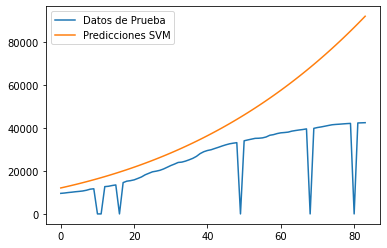

In [297]:
plt.plot(y_test_confirmed_aqp)
plt.plot(theta_svm_pred_caqp)
plt.legend(['Datos de Prueba', 'Predicciones SVM'])

Deaths

In [298]:
svm_daqp = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1.5,degree=4, C=.1)
svm_daqp.fit(X_train_deaths_aqp, y_train_deaths_aqp)
theta_svm_pred_daqp = svm_daqp.predict(X_test_deaths_aqp)
svm_pred_daqp = svm_daqp.predict(future_forcast_aqp)

c:\users\user\documents\actual\jupyter\jenv\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [299]:
mse_svm_daqp = mean_squared_error(y_test_deaths_aqp, theta_svm_pred_daqp)
squaremse_svm_daqp = np.sqrt(mse_svm_daqp)
mae_svm_daqp = mean_absolute_error(y_test_deaths_aqp, theta_svm_pred_daqp)
print('Deaths AQP:')
print('SVM MSE: ', mse_svm_daqp)
print('SVM Square MSE: ', squaremse_svm_daqp)
print('SVM MAE: ', mae_svm_daqp)

# Variance Score. The best score is 1.0
variance_svm_daqp = r2_score(y_test_deaths_aqp, theta_svm_pred_daqp)
print('Variance score: %.2f' % variance_svm_daqp)

Deaths AQP:
SVM MSE:  764721.7301585196
SVM Square MSE:  874.4836934777684
SVM MAE:  583.2202233120145
Variance score: -4.59


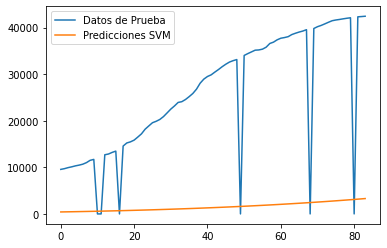

In [300]:
plt.plot(y_test_confirmed_aqp)
plt.plot(theta_svm_pred_daqp)
plt.legend(['Datos de Prueba', 'Predicciones SVM'])

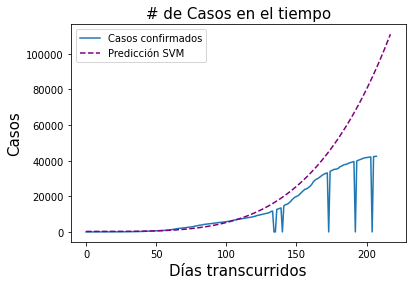

In [301]:
predictions_plot(adjusted_dates_aqp, confirmed_aqp, svm_reg_predictions_caqp, future_forcast_aqp, 'Predicción SVM', 'purple', 'Casos')

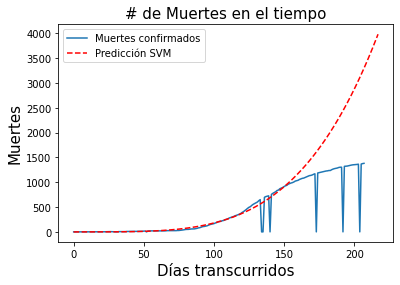

In [302]:
predictions_plot(adjusted_dates_aqp, deaths_aqp, svm_pred_daqp, future_forcast_aqp, 'Predicción SVM', 'red', 'Muertes')

### Fine-tune your model

In [303]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [304]:
from sklearn.model_selection import cross_val_score

linear_poly_scores = cross_val_score(linear_poly_caqp, poly_X_train_caqp, y_train_confirmed_aqp,
                             scoring="neg_mean_squared_error", cv=10)
linear_poly_rmse_scores = np.sqrt(-linear_poly_scores)
display_scores(linear_poly_rmse_scores)

pd.Series(np.sqrt(-linear_poly_scores)).describe()

Scores: [ 69.72088192 168.58971233  60.58342776 176.47306496 380.4503079
  56.4857023  390.85892135 266.85688669  49.12785788 419.56169028]
Mean: 203.87084533621083
Standard deviation: 142.41674591113392


count     10.000000
mean     203.870845
std      150.120431
min       49.127858
25%       62.867791
50%      172.531389
75%      352.051953
max      419.561690
dtype: float64

### Own Linear Regression (Gradient descent)

#### Prepare the data for Machine Learning algorithms

In [305]:
def normalization(data):
    mean_ = data.mean(axis=0) 
    std_ = data.std(axis=0) #estandar
    return (data - mean_)/std_, mean_, std_

In [306]:
def train_test(data,col):
    row = int(0.70 * len(data))
    X_train = data[:row, :col]
    y_train = data[:row, col]
    X_test = data[row:, :col]
    y_test = data[row:, col]
    return X_train, y_train, X_test, y_test

In [307]:
# Add a column of ones (bias)
def add_ones(X_train, y_train, X_test, y_test):
    n_exa_train = len(y_train)
    n_exa_test = len(y_test)

    #X_train = np.c_[(np.ones(n_exa_train), X_train)]
    X_train = np.concatenate((np.ones([n_exa_train, 1]), X_train), axis=1)
    X_test = np.concatenate((np.ones([n_exa_test, 1]), X_test), axis=1)
    
    return X_train, X_test

In [308]:
def prediction(theta, X):
    return np.dot(X, theta.T)

In [309]:
def calculate_cost(X, y, theta):
    #J(theta) = 1/2m sum(h(x) - y)^2
    m = X.shape[0] #nbr of training data 
    pred = prediction(theta, X)
    pred = pred - y
    c = (1/(2*m)) * np.sum(np.square(pred))
    return c, pred

In [310]:
def error(X, y, theta):
    #m = X.shape[0] #nbr of training data
    m = np.size(y)
    pred = X.dot(theta)
    pred = pred - y
    return (1/m) * np.sum(np.square(pred))

In [311]:
def gradient_descent(X, y, theta, nro_iter, learning_rate): 
    m = X.shape[0] #nbr of training data
    #cost_history = np.empty(nro_iter, dtype=float) 
    cost_history = np.zeros(nro_iter)
  
    cost_history[0], pred = calculate_cost(X, y, theta)
    for i in range(nro_iter):
        theta = theta - (learning_rate * (np.dot(pred, X)/m))
        cost_history[i], pred = calculate_cost( X, y, theta) 
    return theta, cost_history

In [312]:
def normal_equation(X, y):
    theta = np.matmul(np.linalg.inv(np.matmul(X.T, X)), np.matmul(X.T, y))
    #theta = np.linalg.inv(X.T.dot(X)).dot((X.T).dot(y))
    return theta

In [313]:
def GD_find_parameters(X_train, X_test, y_train, y_test, epoch, learn_rate):
    
    X_train, X_test = add_ones(X_train, y_train, X_test, y_test)
    
    n_features = X_train.shape[1]
    theta = np.zeros(n_features)
    
    # without list the dimension is (166,1)
    ly_train = []
    for i in y_train:
        ly_train.append(i[0])
    #print('y_train')
    #print(ly_train) 
    #theta = np.random.rand(n_features)

    theta_gd, cost_history = gradient_descent(X_train, ly_train, theta, epoch, learn_rate)
   
    #cost_train, pred = calculate_cost(X_train, ly_train, theta_gd)
    error_train = error(X_train, ly_train, theta_gd)

    theta_ne = normal_equation(X_train, ly_train)
    fig, ax = plt.subplots()
    plt.plot(range(len(cost_history)), cost_history)

    plt.title('Historial de Costo'+str(epoch), {'fontsize':10})

   
    ax.grid(True)
    plt.show()
    return theta_gd, theta_ne, cost_history, error_train

## AQP

In [314]:
X_train_confirmed_aqp, X_test_confirmed_aqp, y_train_confirmed_aqp, y_test_confirmed_aqp = train_test_split(days_since_start_aqp.reshape(-1,1), confirmed_aqp, test_size=0.4, shuffle=False)
X_train_deaths_aqp, X_test_deaths_aqp, y_train_deaths_aqp, y_test_deaths_aqp = train_test_split(days_since_start_aqp.reshape(-1,1), deaths_aqp, test_size=0.4, shuffle=False)
#print(y_test_confirmed_aqp)

#X_train_confirmed_aqp, X_test_confirmed_aqp, y_train_confirmed_aqp, y_test_confirmed_aqp = train_test_split(days_since_start_aqp.reshape(-1,1), confirmed_aqp, test_size=0.2, random_state=42)
#X_train_deaths_aqp, X_test_deaths_aqp, y_train_deaths_aqp, y_test_deaths_aqp = train_test_split(days_since_start_aqp.reshape(-1,1), deaths_aqp, test_size=0.2, random_state=42)

In [315]:
X_train_confirmed_nor_aqp, mean_X_train_caqp, std_X_train_caqp = normalization(X_train_confirmed_aqp)
print('X_train_confirmed_nor')
print(X_train_confirmed_nor_aqp.shape)
print(y_train_confirmed_aqp.shape)
y_train_confirmed_nor_aqp, mean_y_train_caqp, std_y_train_caqp = normalization(y_train_confirmed_aqp)
X_train_deaths_nor_aqp, mean_X_train_daqp, std_X_train_daqp = normalization(X_train_deaths_aqp)
y_train_deaths_nor_aqp, mean_y_train_daqp, std_y_train_daqp = normalization(y_train_deaths_aqp)

X_train_confirmed_nor
(124, 1)
(124, 1)


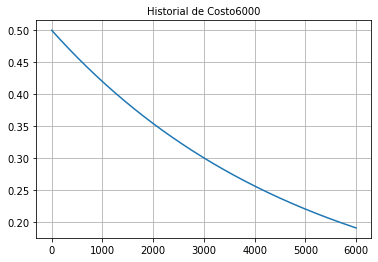

theta GD:  [3.07605196e-17 4.24385185e-01]
Error_train: 0.38178338104441695
theta NE:  [-7.64859158e-17  9.40559935e-01]


In [316]:
epoch = 6000
learn_rate = 0.0001
theta_gd_aqp, theta_ne_aqp, cost_train_aqp, error_train_aqp = GD_find_parameters(X_train_confirmed_nor_aqp, X_test_confirmed_aqp, y_train_confirmed_nor_aqp, y_test_confirmed_aqp, epoch, learn_rate)
print ('theta GD: ', theta_gd_aqp) 
#print ('Cost_train:', cost_train_aqp)
print ('Error_train:', error_train_aqp)
print ('theta NE: ', theta_ne_aqp)

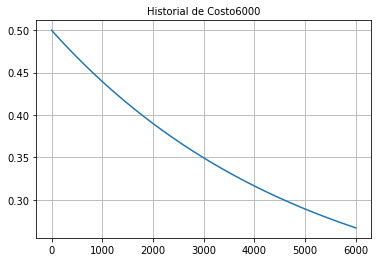

Deaths theta GD:  [-3.40261869e-17  3.68633945e-01]
Deaths Error_train: 0.5335437736172814
Deaths theta NE:  [1.93042695e-16 8.16999113e-01]


In [317]:
epoch = 6000
learn_rate = 0.0001
dtheta_gd_aqp, dtheta_ne_aqp, dcost_train_aqp, derror_train_aqp = GD_find_parameters(X_train_deaths_nor_aqp, X_test_deaths_aqp, y_train_deaths_nor_aqp, y_test_deaths_aqp, epoch, learn_rate)
print ('Deaths theta GD: ', dtheta_gd_aqp) 
#print ('Deaths Cost_train:', dcost_train_aqp)
print ('Deaths Error_train:', derror_train_aqp)
print ('Deaths theta NE: ', dtheta_ne_aqp)

In [318]:
future_forcast_n_caqp = future_forcast_aqp.astype('float64') 
future_forcast_n_caqp = (future_forcast_n_caqp - mean_X_train_caqp)/ std_X_train_caqp
future_forcast_n_caqp = np.c_[ (np.ones( len(future_forcast_n_caqp) ), future_forcast_n_caqp) ]
y_prediction_confirmed_aqp = future_forcast_n_caqp.dot(theta_gd_aqp)
y_prediction_confirmed_aqp = (y_prediction_confirmed_aqp * std_y_train_caqp) + mean_y_train_caqp


future_forcast_n_daqp = future_forcast_aqp.astype('float64') 
future_forcast_n_daqp = (future_forcast_n_daqp - mean_X_train_daqp)/ std_X_train_daqp
future_forcast_n_daqp = np.c_[ (np.ones( len(future_forcast_n_daqp) ), future_forcast_n_daqp) ]
#print(future_forcast_n_daqp.shape)
#print(dtheta_gd_aqp.shape)
y_prediction_deaths_aqp = future_forcast_n_daqp.dot(dtheta_gd_aqp)
y_prediction_deaths_aqp = (y_prediction_deaths_aqp * std_y_train_daqp) + mean_y_train_daqp

In [319]:
dfy_pred_death_aqp = pd.DataFrame({'Fecha': future_forcast_dates_aqp[:11], 'Casos': np.round(y_prediction_confirmed_aqp[:11]),'Deaths':np.round(y_prediction_deaths_aqp[:11])})
dfy_pred_death_aqp

,Fecha,Casos,Deaths
0,10/19/2020,578.0,5.0
1,10/20/2020,612.0,6.0
2,10/21/2020,647.0,8.0
3,10/22/2020,681.0,9.0
4,10/23/2020,715.0,10.0
5,10/24/2020,750.0,11.0
6,10/25/2020,784.0,12.0
7,10/26/2020,818.0,13.0
8,10/27/2020,853.0,15.0
9,10/28/2020,887.0,16.0


In [320]:
#Future predictions 
#dfy_pred_death_aqp = pd.DataFrame({'Fecha': future_forcast_dates_aqp[:60], 'Casos': np.round(y_prediction_confirmed_aqp[:60]),'Deaths':np.round(y_prediction_death_aqp[:60])})
#dfy_pred_death_aqp

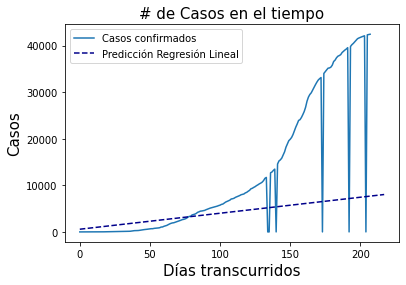

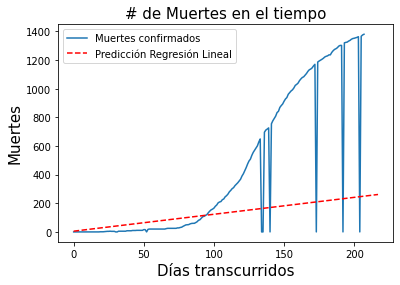

In [321]:
predictions_plot(adjusted_dates_aqp, confirmed_aqp, y_prediction_confirmed_aqp, future_forcast_aqp, 'Predicción Regresión Lineal', 'darkblue', 'Casos')
predictions_plot(adjusted_dates_aqp, deaths_aqp, y_prediction_deaths_aqp, future_forcast_aqp, 'Predicción Regresión Lineal', 'red', 'Muertes')

## PERÚ

In [322]:
X_train_confirmed_p, X_test_confirmed_p, y_train_confirmed_p, y_test_confirmed_p = train_test_split(days_since_start_p.reshape(-1,1), confirmed_p, test_size=0.4, shuffle=False)
X_train_deaths_p, X_test_deaths_p, y_train_deaths_p, y_test_deaths_p = train_test_split(days_since_start_p.reshape(-1,1), deaths_p, test_size=0.4, shuffle=False)
#print(y_test_confirmed_p)

#X_train_confirmed_p, X_test_confirmed_p, y_train_confirmed_p, y_test_confirmed_p = train_test_split(days_since_start_p.reshape(-1,1), confirmed_p, test_size=0.2, random_state=42)
#X_train_deaths_p, X_test_deaths_p, y_train_deaths_p, y_test_deaths_p = train_test_split(days_since_start_p.reshape(-1,1), deaths_p, test_size=0.2, random_state=42)

In [323]:
X_train_confirmed_nor_p, mean_X_train_cperu, std_X_train_cperu = normalization(X_train_confirmed_p)
print('X_train_confirmed_nor_p')
print(X_train_confirmed_nor_p.shape)
print(y_train_confirmed_p.shape)
y_train_confirmed_nor_p, mean_y_train_cperu, std_y_train_cperu = normalization(y_train_confirmed_p)
X_train_deaths_nor_p, mean_X_train_dperu, std_X_train_dperu = normalization(X_train_deaths_p)
y_train_deaths_nor_p, mean_y_train_dperu, std_y_train_dperu = normalization(y_train_deaths_p)

X_train_confirmed_nor_p
(3156, 1)
(3156, 1)


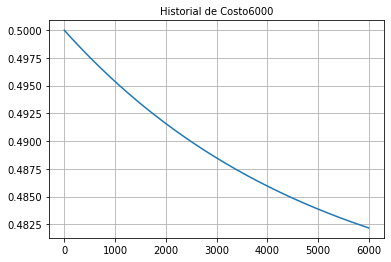

theta GD:  [-1.39201863e-17  1.01911827e-01]
Error_train: 0.9643491883743264
theta NE:  [4.42302755e-17 2.25865993e-01]


In [324]:
epoch = 6000
learn_rate = 0.0001
theta_gd_p, theta_ne_p, cost_train_p, error_train_p = GD_find_parameters(X_train_confirmed_nor_p, X_test_confirmed_p, y_train_confirmed_nor_p, y_test_confirmed_p, epoch, learn_rate)
print ('theta GD: ', theta_gd_p) 
#print ('Cost_train:', cost_train_p)
print ('Error_train:', error_train_p)
print ('theta NE: ', theta_ne_p)

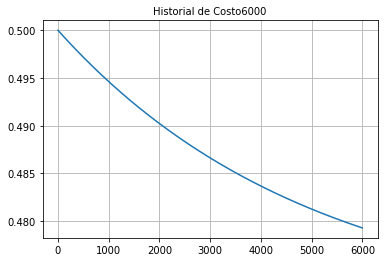

Deaths theta GD:  [5.62321102e-18 1.09812146e-01]
Deaths Error_train: 0.9586075622461553
Deaths theta NE:  [-6.44022432e-16  2.43375378e-01]


In [325]:
epoch = 6000
learn_rate = 0.0001
dtheta_gd_p, dtheta_ne_p, dcost_train_p, derror_train_p = GD_find_parameters(X_train_deaths_nor_p, X_test_deaths_p, y_train_deaths_nor_p, y_test_deaths_p, epoch, learn_rate)
print ('Deaths theta GD: ', dtheta_gd_p) 
#print ('Deaths Cost_train:', dcost_train_p)
print ('Deaths Error_train:', derror_train_p)
print ('Deaths theta NE: ', dtheta_ne_p)

In [326]:
future_forcast_n_cp = future_forcast_p.astype('float64') 
future_forcast_n_cp = (future_forcast_n_cp - mean_X_train_cperu)/ std_X_train_cperu
future_forcast_n_cp = np.c_[ (np.ones( len(future_forcast_n_cp) ), future_forcast_n_cp) ]
y_prediction_confirmed_p = future_forcast_n_cp.dot(theta_gd_p)
y_prediction_confirmed_p = (y_prediction_confirmed_p * std_y_train_cperu) + mean_y_train_cperu


future_forcast_n_dp = future_forcast_p.astype('float64') 
future_forcast_n_dp = (future_forcast_n_dp - mean_X_train_dperu)/ std_X_train_dperu
future_forcast_n_dp = np.c_[ (np.ones( len(future_forcast_n_dp) ), future_forcast_n_dp) ]
y_prediction_deaths_p = future_forcast_n_dp.dot(dtheta_gd_p)
y_prediction_deaths_p = (y_prediction_deaths_p * std_y_train_dperu) + mean_y_train_dperu

In [327]:
dfy_pred_death_p = pd.DataFrame({'Fecha': future_forcast_dates_p[:11], 'Casos': np.round(y_prediction_confirmed_p[:11]),'Deaths':np.round(y_prediction_deaths_p[:11])})
dfy_pred_death_p

,Fecha,Casos,Deaths
0,10/19/2020,3561.0,97.0
1,10/20/2020,3566.0,97.0
2,10/21/2020,3570.0,97.0
3,10/22/2020,3575.0,97.0
4,10/23/2020,3579.0,97.0
5,10/24/2020,3583.0,98.0
6,10/25/2020,3588.0,98.0
7,10/26/2020,3592.0,98.0
8,10/27/2020,3597.0,98.0
9,10/28/2020,3601.0,98.0


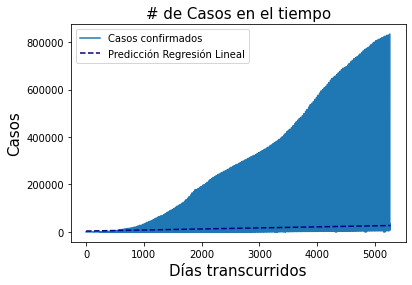

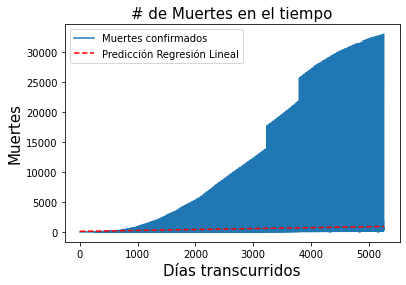

In [328]:
predictions_plot(adjusted_dates_p, confirmed_p, y_prediction_confirmed_p, future_forcast_p, 'Predicción Regresión Lineal', 'darkblue', 'Casos')
predictions_plot(adjusted_dates_p, deaths_p, y_prediction_deaths_p, future_forcast_p, 'Predicción Regresión Lineal', 'red', 'Muertes')

In [329]:
# Multi
X_train_confirmed_p, X_test_confirmed_p, y_train_confirmed_p, y_test_confirmed_p = train_test_split(days_since_start_p.reshape(-1,1), confirmed_p, test_size=0.2, shuffle=False)
X_train_deaths_p, X_test_deaths_p, y_train_deaths_p, y_test_deaths_p = train_test_split(days_since_start_p.reshape(-1,1), deaths_p, test_size=0.2, shuffle=False)
#print(y_test_confirmed_p)

In [330]:
X_train_confirmed_nor_p, mean_X_train_cperu, std_X_train_cperu = normalization(X_train_confirmed_p)
y_train_confirmed_nor_p, mean_y_train_cperu, std_y_train_cperu = normalization(y_train_confirmed_p)
X_train_deaths_nor_p, mean_X_train_dperu, std_X_train_dperu = normalization(X_train_deaths_p)
y_train_deaths_nor_p, mean_y_train_dperu, std_y_train_dperu = normalization(y_train_deaths_p)

X_train_date_cm_p = np.c_[ (X_train_confirmed_nor_p, y_train_confirmed_nor_p)]
X_train_date_dm_p = np.c_[ (X_train_deaths_nor_p, y_train_deaths_nor_p)]

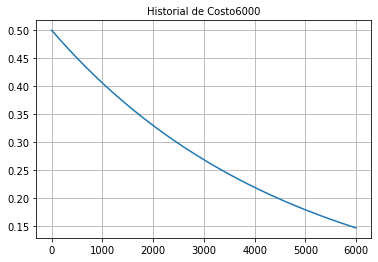

theta GD:  [6.02965080e-18 7.27004598e-02 4.46411145e-01]
Error_train: 0.29402755040393097
theta NE:  [ 3.88366990e-17 -1.11022302e-16  1.00000000e+00]


In [331]:
epoch = 6000
learn_rate = 0.0001
theta_gdm_p, theta_nem_p, cost_trainm_p, error_trainm_p = GD_find_parameters(X_train_date_cm_p, X_test_confirmed_p, y_train_confirmed_nor_p, y_test_confirmed_p, epoch, learn_rate)
print ('theta GD: ', theta_gdm_p) 
#print ('Cost_train:', cost_trainm_p)
print ('Error_train:', error_trainm_p)
print ('theta NE: ', theta_nem_p)

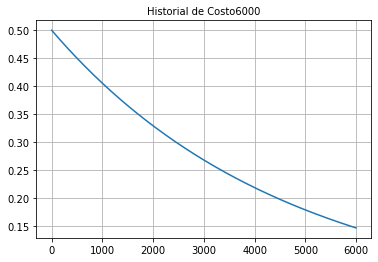

Deaths theta GD:  [3.78472074e-18 7.87608854e-02 4.45582838e-01]
Deaths Error_train: 0.29276534970266793
Deaths theta NE:  [ 6.07878766e-17 -1.11022302e-16  1.00000000e+00]


In [332]:
epoch = 6000
learn_rate = 0.0001
dtheta_gdm_p, dtheta_nem_p, dcost_trainm_p, derror_trainm_p = GD_find_parameters(X_train_date_dm_p, X_test_deaths_p, y_train_deaths_nor_p, y_test_deaths_p, epoch, learn_rate)
print ('Deaths theta GD: ', dtheta_gdm_p) 
#print ('Deaths Cost_train:', dcost_trainm_p)
print ('Deaths Error_train:', derror_trainm_p)
print ('Deaths theta NE: ', dtheta_nem_p)

In [333]:
future_forcast_n_cp = (future_forcast_n_cp - X_train_confirmed_p.mean(axis=0))/ X_train_confirmed_p.std(axis=0)
future_forcast_n_cp = np.c_[ (np.ones( len(future_forcast_n_cp) ), future_forcast_n_cp) ]
#y_prediction_confirmed_p = future_forcast_n_cp.dot(theta_gdm_p)
#y_prediction_confirmed_p = (y_prediction_confirmed_p * y_train_confirmed_p.std(axis=0)) + y_train_confirmed_p.mean(axis=0)


future_forcast_n_dp = (future_forcast_n_dp - X_train_deaths_p.mean(axis=0))/ X_train_deaths_p.std(axis=0)
future_forcast_n_dp = np.c_[ (np.ones( len(future_forcast_n_dp) ), future_forcast_n_dp) ]
#y_prediction_deaths_p = future_forcast_n_dp.dot(dtheta_gdm_p)
#y_prediction_deaths_p = (y_prediction_deaths_p * y_train_deaths_p.std(axis=0)) + y_train_deaths_p.mean(axis=0)

In [334]:
#dfy_pred_death_p = pd.DataFrame({'Fecha': future_forcast_dates_p[:11], 'Casos': np.round(y_prediction_confirmed_p[:11]),'Deaths':np.round(y_prediction_deaths_p[:11])})
#dfy_pred_death_p